# Моделирование взаимодействия популяций

<p style="font-size:20px;">Для моделирования взаимодействия популяций можем использовать систему уравнений Лотки-Вольтерры. Она описывает динамику популяций хищников и жертв, что подходит для моделирования взаимодействий в эволюционном процессе.</p>

## Система выглядит так:

$$
\frac{dx}{dt} = \alpha x - \beta x y
$$

$$
\frac{dy}{dt} = \delta x y - \gamma y
$$

## Где:

-  x  — популяция жертв,
-  y  — популяция хищников,
- $\alpha$  — скорость роста популяции жертв (в отсутствие хищников),
- $\beta$ — коэффициент, описывающий влияние хищников на жертв,
- $\gamma$ — скорость убыли хищников (в отсутствие жертв),
- $\delta$ — коэффициент, описывающий увеличение популяции хищников за счет поедания жертв.

## Шаги реализации поставленной задачи:

1. **Генерация данных с использованием численного решения системы уравнений**
   - Определите параметры системы Лотки-Вольтерры: 
     - 𝛼 (alpha)
     - 𝛽 (beta)
     - 𝛿 (delta)
     - 𝛾 (gamma)
   - Выбираем начальные условия: начальные популяции 
     - 𝑥₀ (x₀) 
     - 𝑦₀ (y₀)
   - Решаем систему уравнений численно с помощью метода Рунге-Кутты (например, `odeint` из `scipy.integrate`), чтобы получить последовательности популяций жертв и хищников для заданных значений параметров и начальных условий.
   - Добавляем шум в данные, чтобы имитировать реальные условия.

2. **Подготовка данных для нейросети**
   - Создаем входные данные для нейросети:
     - Текущие состояния популяций [𝑥ₜ (xₜ), 𝑦ₜ (yₜ)] и параметры системы [𝛼, 𝛽, 𝛿, 𝛾].
   - Создаем целевые значения:
     - Значения популяций на следующем шаге времени [𝑥ₜ₊₁ (xₜ₊₁), 𝑦ₜ₊₁ (yₜ₊₁)].
   - Разделяем данные на обучающий и тестовый наборы.

3. **Создание нейросетевой архитектуры**
   - Определяем архитектуру нейросети:
     - Входной слой: принимает текущее состояние популяций и параметры системы.
     - Один или несколько скрытых слоев с нелинейными активациями (например, ReLU).
     - Выходной слой с двумя нейронами для предсказания значений популяций на следующем шаге времени.

4. **Обучение модели**
   - Инициализируем модель, оптимизатор и функцию потерь:
     - Оптимизатор: Adam.
     - Функция потерь: MSE (среднеквадратичная ошибка).
   - Обучите модель:
     - Минимизируем ошибку между предсказанными и истинными значениями.
     - Следим за метриками обучения и сохраняем модель.

5. **Оценка и сравнение**
   - Предсказание:
     - Используем обученную модель для предсказания значений популяций на основе тестовых данных.
   - Сравниваем результаты:
     - Строим графики для сравнения:
       - Реальных значений популяций (с генерированными данными).
       - Предсказанных значений нейросетью.
       - Аналитических значений (из численного решения).
     - Оцениваем точность предсказаний нейросети.


In [1]:
# Импорты необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# Функция Лотки-Вольтерры
def lotka_volterra(state, t, alpha, beta, delta, gamma):
    x, y = state
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

In [3]:
# Фазовый портрет
def plot_phase_portrait(alpha, beta, delta, gamma):
    x_vals = np.linspace(0, 50, 20)
    y_vals = np.linspace(0, 50, 20)
    X, Y = np.meshgrid(x_vals, y_vals)
    u = alpha * X - beta * X * Y
    v = delta * X * Y - gamma * Y
    
    plt.figure(figsize=(10, 6))
    plt.streamplot(X, Y, u, v, color="blue")
    plt.xlabel("Жертвы (x)")
    plt.ylabel("Хищники (y)")
    plt.title("Фазовый портрет системы Лотки-Вольтерры")
    plt.grid()
    plt.show()

In [4]:
# Поиск стационарных точек
def find_fixed_points(alpha, beta, delta, gamma):
    x_fixed = gamma / delta  # Популяция жертв в стационарной точке
    y_fixed = alpha / beta   # Популяция хищников в стационарной точке
    return (x_fixed, y_fixed)

In [5]:
# Построение бифуркационной диаграммы
def bifurcation_diagram(beta, delta, gamma, x0, y0, t_span):
    alpha_values = np.linspace(0.01, 0.5, 50)
    final_x = []
    final_y = []
    for alpha in alpha_values:
        t = np.linspace(0, t_span, 1000)
        state0 = [x0, y0]
        solution = odeint(lotka_volterra, state0, t, args=(alpha, beta, delta, gamma))
        final_x.append(solution[-1, 0])  # Жертвы на последнем шаге времени
        final_y.append(solution[-1, 1])  # Хищники на последнем шаге времени

    plt.figure(figsize=(10, 6))
    plt.plot(alpha_values, final_x, label='Жертвы (x)', color='green')
    plt.plot(alpha_values, final_y, label='Хищники (y)', color='red')
    plt.xlabel("Параметр α")
    plt.ylabel("Конечные значения популяций")
    plt.title("Бифуркационная диаграмма для параметра α")
    plt.legend()
    plt.grid()
    plt.show()

In [6]:
# Нейросетевая модель
class PopulationPredictor(nn.Module):
    def __init__(self):
        super(PopulationPredictor, self).__init__()
        self.fc1 = nn.Linear(6, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
# Генерация данных с изменяющимися параметрами и шумом
def generate_data_with_noise_and_varying_params(alpha, beta, delta, gamma, x0, y0, t_span, noise_level=0.05):
    t = np.linspace(0, t_span, 100)
    state0 = [x0, y0]
    solution = []

    # Варьируем параметры во времени
    for i in range(len(t)):
        alpha_t = alpha + 0.02 * np.sin(0.1 * t[i]) 
        beta_t = beta + 0.01 * np.cos(0.05 * t[i])   
        delta_t = delta + 0.005 * np.sin(0.03 * t[i])
        gamma_t = gamma + 0.01 * np.cos(0.04 * t[i])
        if i == 0:
            state = state0
        else:
            state = solution[-1]
        state = odeint(lotka_volterra, state, [t[i-1], t[i]], args=(alpha_t, beta_t, delta_t, gamma_t))[-1]
        solution.append(state)

    solution = np.array(solution)
    
    # Добавление шума
    noise = np.random.normal(0, noise_level, solution.shape)
    noisy_solution = solution + noise
    return t, noisy_solution

In [8]:
# Пример генерации данных с шумом и изменением параметров
alpha, beta, delta, gamma = 0.1, 0.02, 0.01, 0.1
x0, y0 = 40, 9
t_span = 200
t, data = generate_data_with_noise_and_varying_params(alpha, beta, delta, gamma, x0, y0, t_span, noise_level=0.1)

In [9]:
# Подготовка данных для обучения нейросети (текущие значения популяций и параметры)
X = np.column_stack((data[:-1], [alpha]*len(t[:-1]), [beta]*len(t[:-1]), [delta]*len(t[:-1]), [gamma]*len(t[:-1])))
y = data[1:]

In [10]:
# Подготовка данных для PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [11]:
# Инициализация модели, оптимизатора и функции потерь
model = PopulationPredictor()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [12]:
# Обучение модели
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 3.0534
Epoch [200/1000], Loss: 1.9851
Epoch [300/1000], Loss: 1.6920
Epoch [400/1000], Loss: 1.5902
Epoch [500/1000], Loss: 1.4876
Epoch [600/1000], Loss: 1.3959
Epoch [700/1000], Loss: 1.3453
Epoch [800/1000], Loss: 1.3130
Epoch [900/1000], Loss: 1.2916
Epoch [1000/1000], Loss: 1.2742


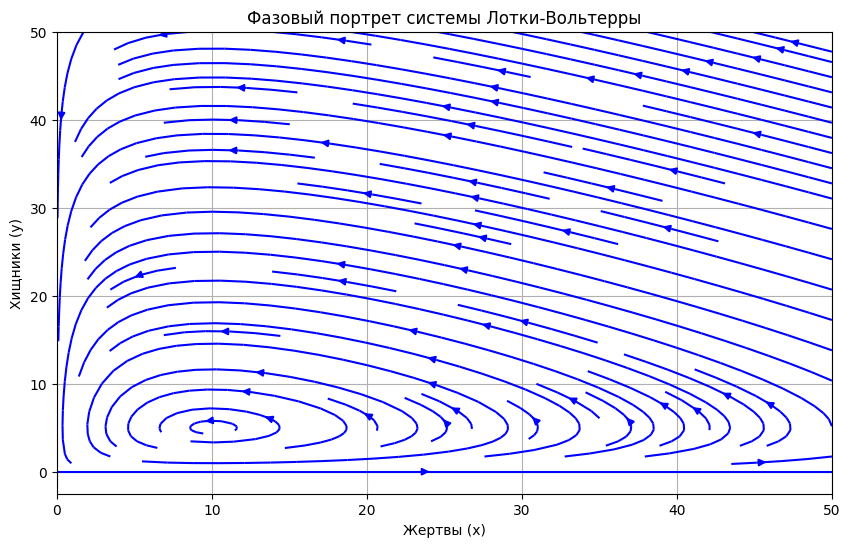

In [13]:
# Фазовый портрет
plot_phase_portrait(alpha, beta, delta, gamma)

In [14]:
# Стационарные точки
x_fixed, y_fixed = find_fixed_points(alpha, beta, delta, gamma)
print(f"Стационарная точка: x = {x_fixed:.2f}, y = {y_fixed:.2f}")

Стационарная точка: x = 10.00, y = 5.00


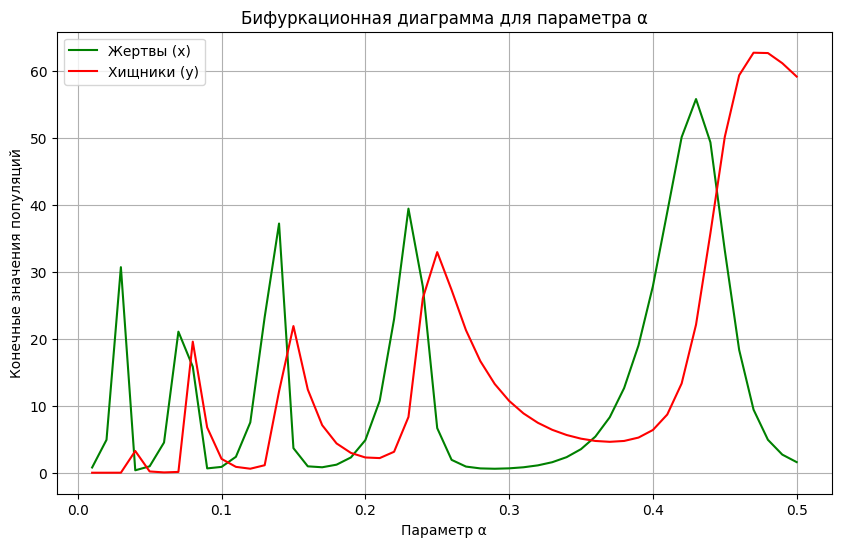

In [15]:
# Бифуркационная диаграмма по параметру α
bifurcation_diagram(beta, delta, gamma, x0, y0, t_span)

In [16]:
# Предсказание на основе обученной модели
model.eval()
with torch.no_grad():
    predicted = model(X_tensor).numpy()

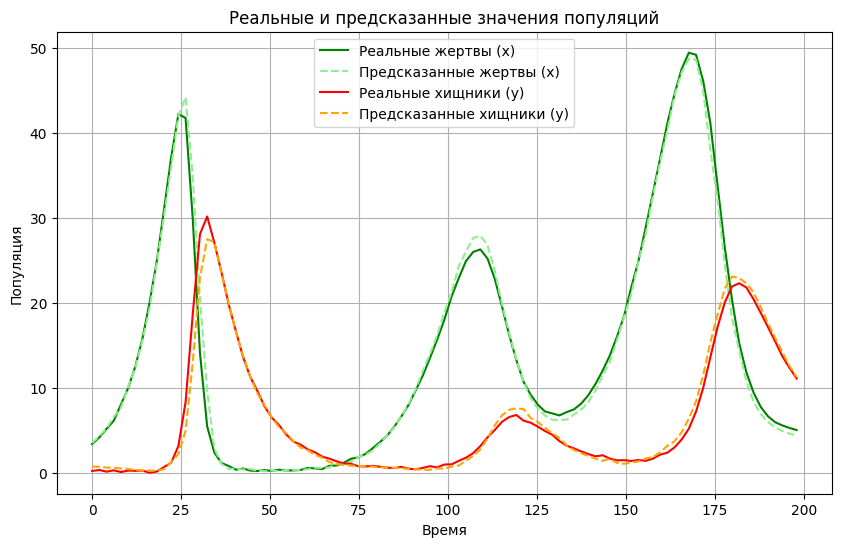

In [17]:
# Визуализация реальных и предсказанных значений популяций
time_points = np.linspace(0, t_span, len(y) + 1)
plt.figure(figsize=(10, 6))
plt.plot(time_points[:-1], y[:, 0], label="Реальные жертвы (x)", color='green')
plt.plot(time_points[:-1], predicted[:, 0], label="Предсказанные жертвы (x)", linestyle='--', color='lightgreen')

plt.plot(time_points[:-1], y[:, 1], label="Реальные хищники (y)", color='red')
plt.plot(time_points[:-1], predicted[:, 1], label="Предсказанные хищники (y)", linestyle='--', color='orange')

plt.xlabel("Время")
plt.ylabel("Популяция")
plt.title("Реальные и предсказанные значения популяций")
plt.legend()
plt.grid()
plt.show()